In [2]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '96b532e9-3abd-4b60-8869-e78f065c2a7e',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2024-07-04T17:40:32.164Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10015}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11592, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [4]:
# that allows us to see all the columns not just 15)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# normalize the data and make it pretty in a dataframe:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971945e+07,1.971945e+07,False,NaN,1,NaN,NaN,None,2024-07-04T17:39:00.000Z,58133.312898,4.027513e+10,47.3093,0.391380,-3.643054,-5.896773,-17.412122,-9.627222,-14.213912,1.146357e+12,53.6791,1.220800e+12,None,2024-07-04T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
1,1027,Ethereum,ETH,ethereum,9118,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201951e+08,1.201951e+08,True,NaN,2,NaN,NaN,None,2024-07-04T17:38:00.000Z,3134.850950,2.077985e+10,50.7198,0.480083,-5.160505,-9.320837,-17.670489,-0.690475,-5.731981,3.767938e+11,17.6371,3.767938e+11,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
2,825,Tether USDt,USDT,tether,90932,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124849e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-04T17:38:00.000Z,0.999442,7.475649e+10,44.4784,0.020372,0.050133,0.034294,-0.071416,-0.083434,-0.103651,1.124221e+11,5.2637,1.160120e+11,None,2024-07-04T17:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-04 12:40:33.402493
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475829e+08,1.475829e+08,False,NaN,4,NaN,NaN,None,2024-07-04T17:38:00.000Z,523.904321,2.048936e+09,19.1248,0.891513,-6.100274,-9.719864,-21.392495,-11.776797,-10.014869,7.731934e+10,3.6200,7.731934e+10,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
4,5426,Solana,SOL,solana,698,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.628872e+08,5.795354e+08,True,NaN,5,NaN,NaN,None,2024-07-04T17:38:00.000Z,135.010779,3.245868e+09,15.6036,0.664922,-5.218726,-8.960095,-19.958519,-8.389060,-22.342474,6.249476e+10,2.9241,7.824353e+10,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
5,3408,USDC,USDC,usd-coin,20782,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.291590e+10,3.291590e+10,False,NaN,6,NaN,NaN,None,2024-07-04T17:38:00.000Z,1.000132,7.098277e+09,27.2668,0.016744,0.015043,0.022252,-0.003244,-0.005569,0.016794,3.292024e+10,1.5409,3.292024e+10,None,2024-07-04T17:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-04 12:40:33.402493
6,52,XRP,XRP,xrp,1347,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-04T17:39:00.000Z,0.442916,1.560910e+09,40.4026,0.445012,-5.119730,-6.412712,-15.905922,-16.722913,-24.283674,2.466524e+10,1.1549,4.429158e+10,None,2024-07-04T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
7,11419,Toncoin,TON,toncoin,450,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.494532e+09,5.108519e+09,True,NaN,8,3.414167e+09,2.479224e+10,None,2024-07-04T17:38:00.000Z,7.261579,5.228280e+08,46.6867,0.379716,-7.484604,-5.546392,3.549291,22.527127,34.615530,1.811424e+10,0.8480,3.709592e+10,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
8,74,Dogecoin,DOGE,dogecoin,1018,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exch

In [6]:
# Importing libraries:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import csv
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '96b532e9-3abd-4b60-8869-e78f065c2a7e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # normalize the data and make it pretty in a dataframe:
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
    # to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\sanas\Documents\API.csv'):
    #     df.to_csv(r'C:\Users\sanas\Documents\APIs', header='column_names')
    # else:
    #       df.to_csv(r'C:\Users\sanas\Documents\APIs', mode='a', header=False)
        
    #Then to read in the file:
    # df33 = pd.read_csv(r'C:\Users\sanas\Documents\APIs') 

In [8]:
# make the program sleep for 1 minute and then run again automatically
for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) 
exit()
    

API Runner completed!


KeyboardInterrupt: 

In [9]:
# to change the default display format for floating-point numbers in the  DataFrame:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [10]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719450.00000,19719450.00000,False,NaN,1,NaN,NaN,None,2024-07-04T17:39:00.000Z,58133.31290,40275125215.89380,47.30930,0.39138,-3.64305,-5.89677,-17.41212,-9.62722,-14.21391,1146356957029.52905,53.67910,1220799570861.26001,None,2024-07-04T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
1,1027,Ethereum,ETH,ethereum,9118,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120195136.34302,120195136.34302,True,NaN,2,NaN,NaN,None,2024-07-04T17:38:00.000Z,3134.85095,20779847758.00182,50.71980,0.48008,-5.16050,-9.32084,-17.67049,-0.69047,-5.73198,376793837403.89362,17.63710,376793837403.89001,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
2,825,Tether USDt,USDT,tether,90932,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112484875382.93484,116076856617.38103,True,NaN,3,NaN,NaN,None,2024-07-04T17:38:00.000Z,0.99944,74756490173.26839,44.47840,0.02037,0.05013,0.03429,-0.07142,-0.08343,-0.10365,112422056218.53896,5.26370,116012031447.64999,None,2024-07-04T17:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-04 12:40:33.402493
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582932.91234,147582932.91234,False,NaN,4,NaN,NaN,None,2024-07-04T17:38:00.000Z,523.90432,2048935697.72481,19.12480,0.89151,-6.10027,-9.71986,-21.39250,-11.77680,-10.01487,77319336188.02788,3.62000,77319336188.03000,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493
4,5426,Solana,SOL,solana,698,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462887209.17723,579535429.09410,True,NaN,5,NaN,NaN,None,2024-07-04T17:38:00.000Z,135.01078,3245868426.68840,15.60360,0.66492,-5.21873,-8.96009,-19.95852,-8.38906,-22.34247,62494762522.68459,2.92410,78243529517.89999,None,2024-07-04T17:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-04 12:40:33.402493


In [13]:
# Now let's look at the coin trends over time
# group the data by name of cryptocurrency

df3_grouped = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.39138,-3.64305,-5.89677,-17.41212,-9.62722,-14.21391
Ethereum,0.48008,-5.16050,-9.32084,-17.67049,-0.69047,-5.73198
Tether USDt,0.02037,0.05013,0.03429,-0.07142,-0.08343,-0.10365
BNB,0.89151,-6.10027,-9.71986,-21.39250,-11.77680,-10.01487
Solana,0.66492,-5.21873,-8.96009,-19.95852,-8.38906,-22.34247
USDC,0.01674,0.01504,0.02225,-0.00324,-0.00557,0.01679
XRP,0.44501,-5.11973,-6.41271,-15.90592,-16.72291,-24.28367
Toncoin,0.37972,-7.48460,-5.54639,3.54929,22.52713,34.61553
Dogecoin,0.23029,-8.68803,-13.50273,-32.52697,-33.19405,-38.14123


In [12]:
# aggregation of the DF group by object:
df3_aggregated = df3_grouped.sum()
df3_aggregated

quote.USD.percent_change_1h       5.92499
quote.USD.percent_change_24h    -73.83063
quote.USD.percent_change_7d     -97.52728
quote.USD.percent_change_30d   -238.61199
quote.USD.percent_change_60d   -171.11948
quote.USD.percent_change_90d   -248.58470
dtype: float64

In [91]:
# to make the columns as rows

df4=df3_aggregated.stack()


name                                     
Bitcoin      quote.USD.percent_change_1h      -0.28556
             quote.USD.percent_change_24h      3.92170
             quote.USD.percent_change_7d     -38.12050
             quote.USD.percent_change_30d    -41.86305
             quote.USD.percent_change_60d     -0.07784
             quote.USD.percent_change_90d     -6.78400
Ethereum     quote.USD.percent_change_1h       0.51909
             quote.USD.percent_change_24h     28.41367
             quote.USD.percent_change_7d      -3.23848
             quote.USD.percent_change_30d     56.68341
             quote.USD.percent_change_60d     91.95971
             quote.USD.percent_change_90d     18.54202
Tether USDt  quote.USD.percent_change_1h      -0.01711
             quote.USD.percent_change_24h      0.01566
             quote.USD.percent_change_7d      -0.20671
             quote.USD.percent_change_30d     -0.52368
             quote.USD.percent_change_60d     -0.58493
             quote.USD.

In [105]:
type(df4)

pandas.core.series.Series

In [106]:
# return back to a dataframe:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.28556
        quote.USD.percent_change_24h   3.92170
        quote.USD.percent_change_7d  -38.12050
        quote.USD.percent_change_30d -41.86305
        quote.USD.percent_change_60d  -0.07784

In [120]:
df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28556
1,Bitcoin,quote.USD.percent_change_24h,3.92170
2,Bitcoin,quote.USD.percent_change_7d,-38.12050
3,Bitcoin,quote.USD.percent_change_30d,-41.86305
4,Bitcoin,quote.USD.percent_change_60d,-0.07784


In [110]:
type(df6)

pandas.core.frame.DataFrame

In [113]:
# rename the column level_1:
df7 = df6.rename(columns={'level_1':'percentage_change'})
df7.head()

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28556
1,Bitcoin,quote.USD.percent_change_24h,3.92170
2,Bitcoin,quote.USD.percent_change_7d,-38.12050
3,Bitcoin,quote.USD.percent_change_30d,-41.86305
4,Bitcoin,quote.USD.percent_change_60d,-0.07784


In [114]:
df7['percentage_change']=df7['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [115]:
df7

,name,percentage_change,values
0,Bitcoin,1h,-0.28556
1,Bitcoin,24h,3.92170
2,Bitcoin,7d,-38.12050
3,Bitcoin,30d,-41.86305
4,Bitcoin,60d,-0.07784
5,Bitcoin,90d,-6.78400
6,Ethereum,1h,0.51909
7,Ethereum,24h,28.41367
8,Ethereum,7d,-3.23848
9,Ethereum,30d,56.68341


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


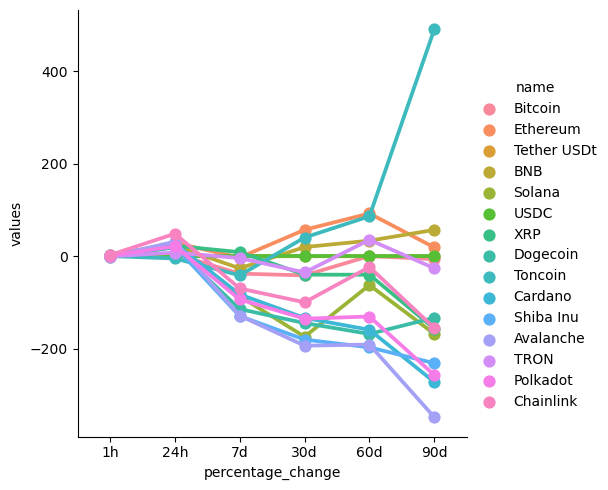

In [117]:
# Visualizing the average of change for each cryptocurrency
# Point Plot: The plot will show points for each combination of percentage change and values,
#connected by lines within each name category to show trends.
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')
# the 'hue' parameter is useful because we have multiple groups (name groups) and we want to compare trends over time



In [118]:
# we are going to create a dataframe with the columns we want
df8 = df[['name', 'quote.USD.price','timestamp']]
df8=df8.query("name=='Bitcoin'")

df8


,name,quote.USD.price,timestamp
0,Bitcoin,65081.97555,2024-06-19 12:16:45.568718
0,Bitcoin,65081.66520,2024-06-19 12:37:04.215641
0,Bitcoin,65090.43155,2024-06-19 13:13:27.910292
0,Bitcoin,64840.55074,2024-06-19 14:32:11.206698
0,Bitcoin,64833.26087,2024-06-19 14:33:11.873040
0,Bitcoin,64877.78737,2024-06-19 15:06:38.930122
0,Bitcoin,64834.36544,2024-06-19 15:33:05.282976
0,Bitcoin,64821.49186,2024-06-19 15:37:22.373063


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

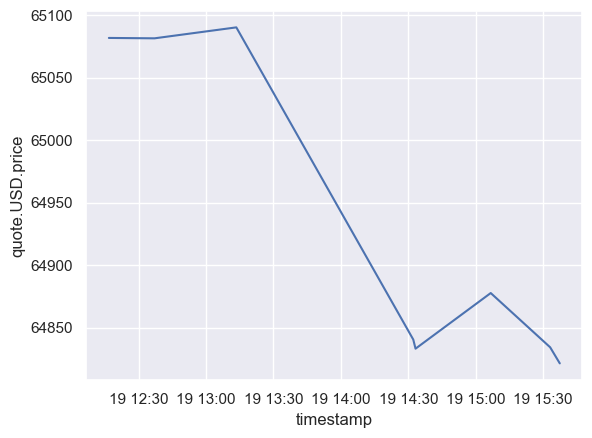

In [119]:
# visualizing the quote.USD.price over time
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)
 